In [38]:
import tslearn
import numpy as np
import pandas as pd

In [39]:
df_input = pd.read_csv('dataset_median.csv',header=None)
np_input = df_input.values
print(np_input.shape)

(32, 205)


In [40]:
X_train = np_input[:,1:]
print(X_train.shape)

(32, 204)


In [41]:
from scipy.spatial.distance import cdist 
from tslearn.clustering import TimeSeriesKMeans
distortions = [] 
inertias = [] 
mapping1 = {}   # Used for distortion calculation, didnt use
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
#     kmeanModel = KMeans(n_clusters=k).fit(X) 
    km = TimeSeriesKMeans(n_clusters=k, metric="dtw",max_iter = 900,tol = 1e-08)
    km.fit(X_train)     
      
    inertias.append(km.inertia_) 
    predictions = km.predict(X_train)
  
    print(km.inertia_)
    mapping2[k] = km.inertia_ 
    for c in range(k):
        c_0 = np.argwhere(predictions==c)
        print(c_0.shape[0],end=' ')
    print('----------------------------------------')

c:\users\chinmay\appdata\local\programs\python\python37\lib\site-packages\tslearn\utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 32 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


114027.88754985531
32 ----------------------------------------


c:\users\chinmay\appdata\local\programs\python\python37\lib\site-packages\tslearn\utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 32 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


83781.548251364
10 22 ----------------------------------------


c:\users\chinmay\appdata\local\programs\python\python37\lib\site-packages\tslearn\utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 32 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


74178.35551859582
15 9 8 ----------------------------------------


c:\users\chinmay\appdata\local\programs\python\python37\lib\site-packages\tslearn\utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 32 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


70948.52549923344
19 6 4 3 ----------------------------------------


c:\users\chinmay\appdata\local\programs\python\python37\lib\site-packages\tslearn\utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 32 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


67113.93405249927
12 3 9 7 1 ----------------------------------------


c:\users\chinmay\appdata\local\programs\python\python37\lib\site-packages\tslearn\utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 32 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


60515.48586083911
1 8 11 4 1 7 ----------------------------------------


c:\users\chinmay\appdata\local\programs\python\python37\lib\site-packages\tslearn\utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 32 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


53125.00929719898
5 4 3 7 4 2 7 ----------------------------------------


c:\users\chinmay\appdata\local\programs\python\python37\lib\site-packages\tslearn\utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 32 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


52165.343853186816
10 2 2 2 6 7 1 2 ----------------------------------------


c:\users\chinmay\appdata\local\programs\python\python37\lib\site-packages\tslearn\utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 32 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


46922.18955823811
3 7 3 3 5 5 4 1 1 ----------------------------------------


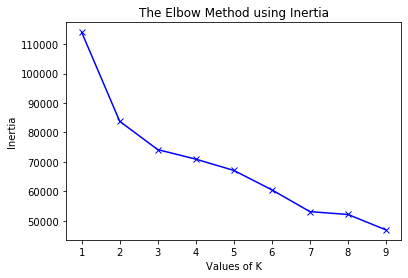

In [42]:
import matplotlib.pyplot as plt 
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [47]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=3, metric="dtw",max_iter = 900,tol = 1e-08,random_state=3)
km.fit(X_train)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=900,
                 max_iter_barycenter=100, metric='dtw', metric_params=None,
                 n_clusters=3, n_init=1, n_jobs=None, random_state=3, tol=1e-08,
                 verbose=0)

In [48]:
predictions = km.predict(X_train)
for c in range(3):
    c_0 = np.argwhere(predictions==c)
    print(c_0.shape[0],end=' ')
c_assign = np.zeros(32)
for k in range(3):
    c_0 = np.argwhere(predictions==k)
    c_assign[c_0] = k
#     print(k,c_0)
print(c_assign)

c:\users\chinmay\appdata\local\programs\python\python37\lib\site-packages\tslearn\utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 32 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


14 10 8 [0. 1. 1. 0. 1. 2. 2. 0. 0. 1. 0. 0. 2. 1. 2. 1. 0. 0. 2. 2. 0. 0. 1. 0.
 2. 1. 2. 1. 0. 1. 0. 0.]


[ 0  3  7  8 10 11 16 17 20 21 23 28 30 31] 96.53186274509804
[ 0  3  7  8 10 11 16 17 20 21 23 28 30 31] 106.46845588235301
[ 0  3  7  8 10 11 16 17 20 21 23 28 30 31] 106.94852941176471
[ 0  3  7  8 10 11 16 17 20 21 23 28 30 31] 90.32107843137256
[ 0  3  7  8 10 11 16 17 20 21 23 28 30 31] 99.64950980392157
[ 0  3  7  8 10 11 16 17 20 21 23 28 30 31] 95.02450980392157
[ 0  3  7  8 10 11 16 17 20 21 23 28 30 31] 86.93455882352931
[ 0  3  7  8 10 11 16 17 20 21 23 28 30 31] 93.4779411764706
[ 0  3  7  8 10 11 16 17 20 21 23 28 30 31] 88.69497549019609
[ 0  3  7  8 10 11 16 17 20 21 23 28 30 31] 87.18625000000003
[ 0  3  7  8 10 11 16 17 20 21 23 28 30 31] 83.04411764705883
[ 0  3  7  8 10 11 16 17 20 21 23 28 30 31] 88.63480392156863
[ 0  3  7  8 10 11 16 17 20 21 23 28 30 31] 79.27522058823529
[ 0  3  7  8 10 11 16 17 20 21 23 28 30 31] 87.61083333333333
cluster  0 --> 92.12876050420168
[ 1  2  4  9 13 15 22 25 27 29] 115.28676470588235
[ 1  2  4  9 13 15 22 25 27 29] 109.92647058823

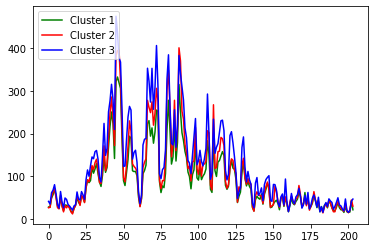

In [49]:
x = [ i for i in range(204)]

colors = ['green','red','blue','yellow','purple','cyan']
K = 3
for k in range(K):
    cluster_avg = 0
    size =0
    c_k_stations = np.argwhere(c_assign == k).flatten()
    cluster_trend = np.zeros((204,))
#     print(cluster_trend.shape)
    for station in c_k_stations:
        
        temporal_trend_max  = X_train[station]
        y = temporal_trend_max
#         print(y.shape)
        cluster_trend  = cluster_trend + y
        cluster_avg += np.sum(y)
        print(c_k_stations,np.sum(y)/204)
        size +=1
#         if(k in [0,1]):
#         plt.plot(x,y,color = colors[k])
    # Single trend per cluster
    cluster_trend = cluster_trend / size
#     if(k==0):
    plt.plot(x,cluster_trend,color = colors[k],label = "Cluster "+str(k+1))
    print("cluster ",k,"-->",cluster_avg/(size*204))
    
plt.legend(loc="upper left")
plt.show()

    